AML ASSIGNMENT-2\
OMER BIN ALI BAJUBAIR\
Z1905006


In [22]:
pip install --upgrade xlrd   # after running this restart the runtime

1.  Visualize the univariate distribution of each continuous variable, and the distribution of the target. Did you
notice anything? Is there something that might require special treatment? 

In [23]:
# if you are getting error run this below :
#pip install --upgrade xlrd
# reading the data through the URL
import requests
import pandas as pd
url = 'https://github.com/omer1997/APPLIED-MACHINE-LEARNING/blob/main/AmesHousing.xls?raw=true'
r = requests.get(url)
open('ames.xls', 'wb').write(r.content)
data = pd.read_excel('ames.xls')   #storing the excel by reading from the url as ames.xls
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,

In [24]:
# total continous variables : 20 ( including salesprice)
continous_variable = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
                 'Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
                'Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF',
                'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area',
                'Misc Val']
target = 'SalePrice'

# Nominal Data is used to label variables without any order or quantitative value. 
# The colour of hair can be considered nominal data, as one colour can’t be compared with another colour.
# Ordinal data have natural ordering where a number is present in some kind of order by their position on the scale. 
# Letter grades in the exam (A, B, C, D, etc.) 
# The term discrete means distinct or separate.
# The discrete data contain the values that fall under integers or whole numbers.
# Numbers of employees in a company
# Continuous data are in the form of fractional numbers. 
# It can be the version of an android phone, the height of a person, the length of an object, etc. 

print(len(data.columns))   # we have 82 columns ( features)
print(continous_variable)
print(target)  # salesprice

82
['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
SalePrice


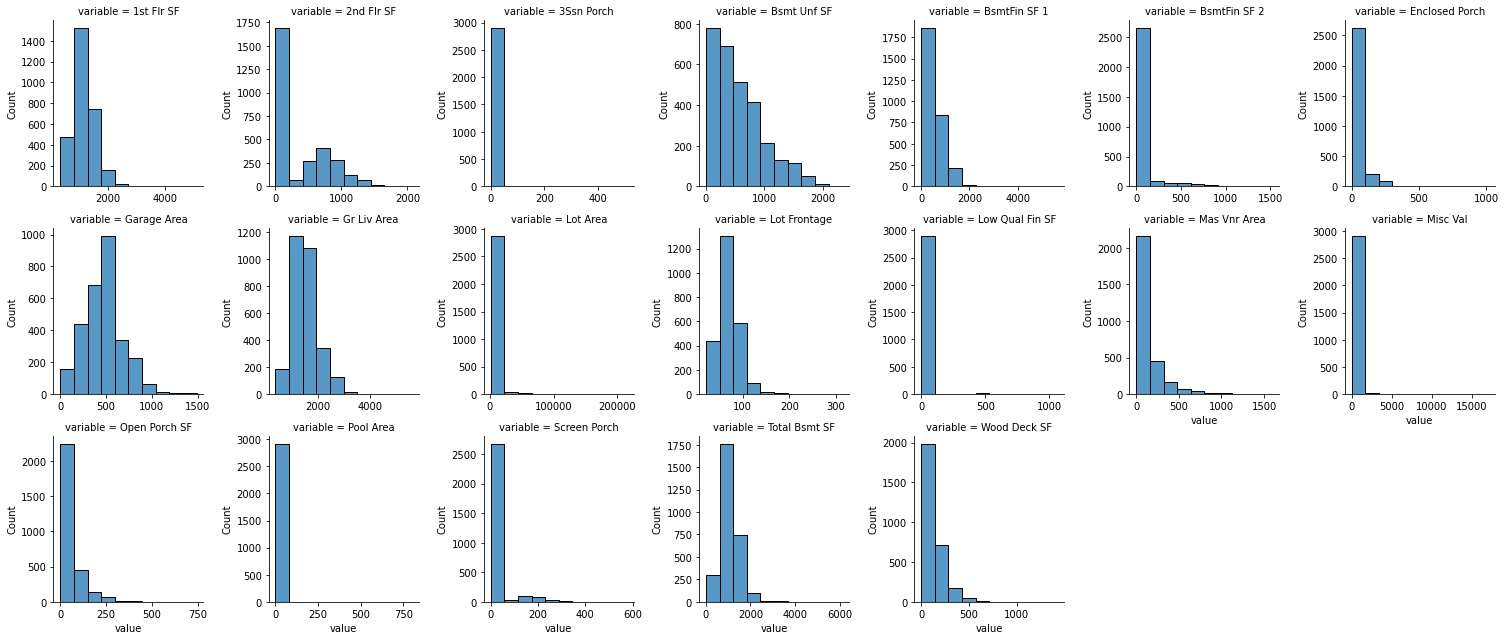

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import floor
# Visualize the univariate distribution of each continuous variable
g = pd.melt(data, value_vars=sorted(continous_variable))  # unpivot' data from a 'wide format' into a 'long format
# FacetGrid class helps in visualizing distribution of one variable as well 
# as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
h = sns.FacetGrid(g, col='variable', col_wrap=7, sharex=False, sharey=False)  # we dont want to have a common axis thats y sharex and shrey is false
h = h.map(sns.histplot, 'value',bins = 10)

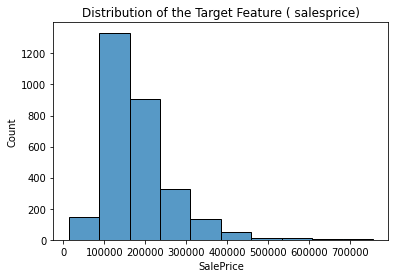

In [26]:
# target variable visualization
sns.histplot(data, x = target,bins= 10)
plt.title('Distribution of the Target Feature ( salesprice)')
plt.show()

Observation - We can see from the above cell that we have histograms like pool area, lot area etc have extremely skewed distributions. We need to solve this issue i guess we want to log transform these to make them more normal distribution shape.



2. Visualize the dependency of the target on each continuous feature (2d scatter plot). 

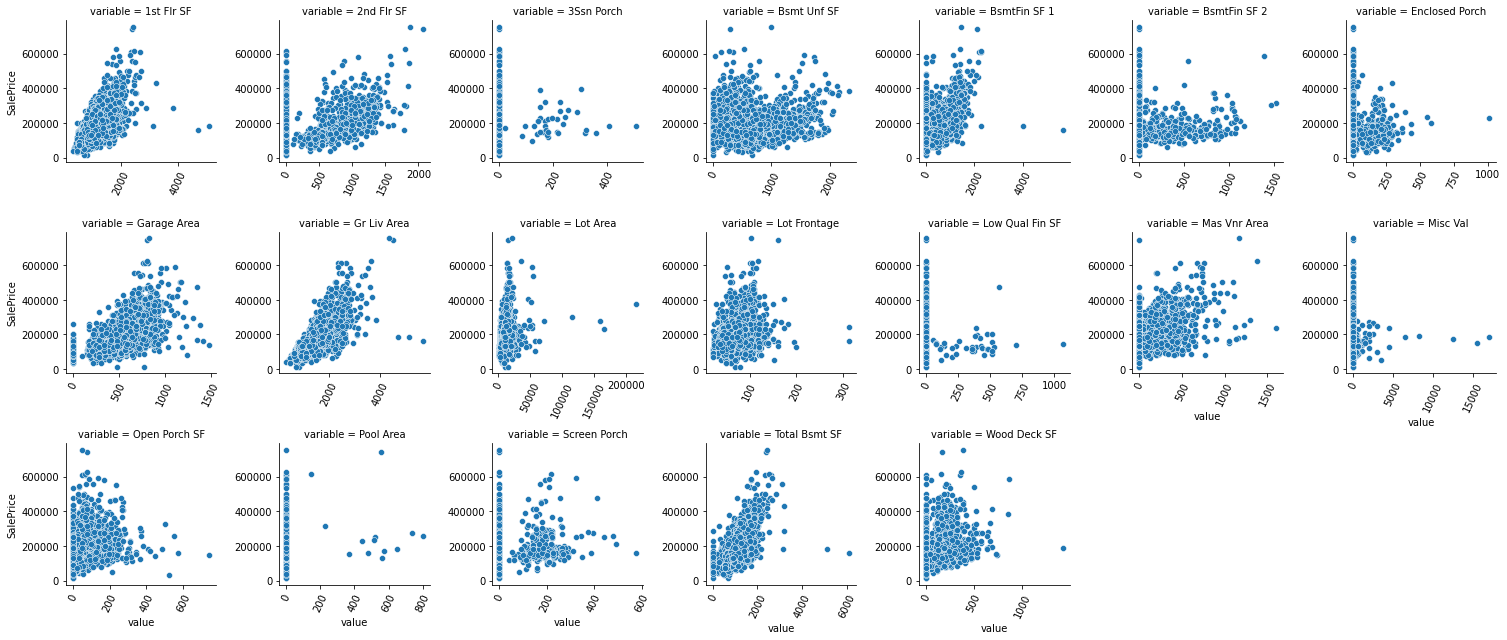

In [27]:
# 2 question : Visualize the dependency of the target on each continuous feature (2d scatter plot).
g = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(continous_variable))
# Pd. melt allows you to 'unpivot' data from a 'wide format' into a 'long format'
h = sns.FacetGrid(g, col='variable', col_wrap=7, sharex=False, sharey=False)
#  FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid.
plt.xticks(rotation='vertical')
h = h.map(sns.scatterplot,'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=65) for ax in h.axes.flat]
h.fig.tight_layout()
plt.show()


3. For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable (onehot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the
target.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
import warnings
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

nan
0.11295916235368801
0.001790271724077397
nan
0.20584734657050713
0.07208186256897868
nan
0.03761605123819132
-0.0006315820114277448
0.005565751683140818
nan
0.08000053177169097
nan
nan
0.0010593747445161394
0.5499801895548555
0.04063037847916338
0.47488041287074295
0.017905925461918337
nan
0.008073390530095526
0.03139369540027841
0.07477970323292953
nan
nan
nan
0.007479247434472103
nan
0.07840179642183735
0.154672444139666
0.15310500270517632
nan
0.48938817211329094
0.02568526149846928
0.2712093986133349
nan
nan
nan
nan
nan
nan
nan
0.13001641328352267
0.13395128650906402
Categorical Variable with best R^2 values:
Variable: MS SubClass, R^2 = nan
Variable: MS Zoning, R^2 = 0.11295916235368801
Variable: Alley, R^2 = nan


ValueError: ignored

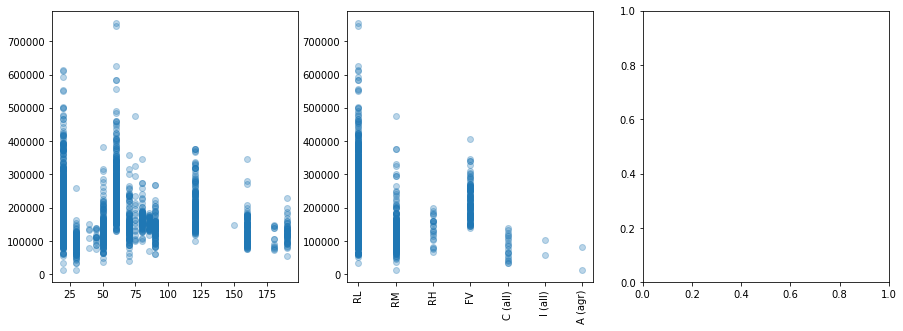

In [29]:
categorical_variables = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 
                 'Heating QC', 'Central Air', 'Electrical', 
                 'Land Contour', 'Utilities', 'Lot Config', 
                 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
                  'Land Slope', 'Neighborhood', 'Condition 1', 
                 'Kitchen Qual', 'Functional', 'Fireplace Qu', 
                  'Condition 2', 'Bldg Type', 'House Style', 
                 'Bsmt Qual', 'Bsmt Cond', 
                  'Overall Qual', 'Roof Matl',  'Overall Cond', 
                 'Roof Style','Exterior 1st', 'Exterior 2nd', 
                  'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 
                  'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
                  'Garage Type', 'Garage Finish', 'Garage Qual', 
                 'Misc Feature', 'Sale Type', 'Sale Condition']

X = data.loc[:, data.columns[:-1]]
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=5)

r2 = []
li = LinearRegression()
for c in categorical_variables:
  onehotenc = OneHotEncoder(categories=[x_train[c].astype(str).unique()])
  train_var = x_train[c].values.reshape(-1, 1)
  cross_score = cross_val_score(make_pipeline(onehotenc, li), train_var, y_train, cv=5)
  r2.append(cross_score.mean())

# printing stored r2_values
for i in r2:
  print(i)

# storing top 2 categorical variables with best r^2 
best_cat = sorted(zip(r2, categorical_variables), reverse=True)[:3]
print('Categorical Variable with best R^2 values:')
# printing the r^2 values.
for r2, bc in best_cat:
    print('Variable: {}, R^2 = {}'.format(bc,r2))


f, ax = plt.subplots(1, 3, figsize=(15,5))
for i, (R_2, var) in enumerate(best_cat):
    ax[i].scatter(x_train[var], y_train, alpha = 0.3)
    if i==1:
      plt.sca(ax[1])
      plt.xticks(rotation=90)
plt.tight_layout()
plt.show()    

4. Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help? Read about ColumnTransformer below.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
import warnings
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = data.loc[:, data.columns[:-1]]   # ALL DATA EXCEPT SALESPRICE
range(X.shape[1])
X

In [ ]:
# The ColumnTransformer helps performing different transformations for different columns of the data,
# within a Pipeline that is safe from data leakage and that can be parametrized.

categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # onehotencoder for nominal data same like get dummies for cross validation ,grid search
# ignore if an unknown categorical feature is present during transform
X = data.loc[:, data.columns[:-1]]
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=0)
categorical = x_train.dtypes == object   # if dtypes is objects in xtrain then assignt to the variable categorical
linreg = LinearRegression() 

# experimenting with various models. like ridge, lasso, elasticnet...
various_models = [linreg, Ridge(), Lasso(), ElasticNet()]
various_model_names = ['Linear Regression','Ridge','Lasso','ElasticNet']

# The imputation fill value for each feature if axis == 0 with median value
imputation = SimpleImputer(strategy='median')
# prepare the columns of your dataset before fitting a model on the transformed data.
unscaled_column_transform =  make_column_transformer((categorical_transformer,categorical),(imputation,~categorical))

# Standardize features by removing the mean and scaling to unit variance
# StandardScaler removes the mean and scales each feature/variable to unit variance.
standardscaler = StandardScaler()
# make_pipeline' is a utility function that is a shorthand for constructing pipelines
pipeline = make_pipeline(imputation,standardscaler)
scaled_column_transform =  make_column_transformer((categorical_transformer,categorical),(pipeline,~categorical))

for a,b in zip(various_models,various_model_names):
  unscaled_model_pipeline = make_pipeline(unscaled_column_transform,a)
  # The cross_val_score() function will be used to perform the evaluation
  scores_unscaled = cross_val_score(unscaled_model_pipeline, x_train, y_train, cv = 8)
  print('{} score: (without scaling) {} '.format(b,np.mean(scores_unscaled)))

  scaled_model_pipeline = make_pipeline(scaled_column_transform,a)
  scores_scaled = cross_val_score(scaled_model_pipeline, x_train, y_train, cv = 8)
  print('{} score: (with scaling) {} '.format(b,np.mean(scores_scaled)))

Conclusion for 1.4:
Yes as we can see that the accuracy without and with scaling is different, scaling helps the model significantly improve the result.

5. Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence
of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [ ]:
from sklearn.model_selection import GridSearchCV
# gridsearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.

In [ ]:
# as we are told to tune the parameters for ridge, lasso and elasticnet. we have the list of parameters
tuned_parameters = [{'ridge__alpha':  np.logspace(-3, 3, 13)},{'lasso__alpha': np.logspace(-3, 3, 13)},{'elasticnet__alpha': np.logspace(-3, 3, 7)}]
#logspace : Return numbers spaced evenly on a log scale.

# using gridsearchcv for tuning parameters
for item,model,model_name in zip(tuned_parameters,various_models[1:],various_model_names[1:]):   # starting from ridge,lasso,elasticnet and not linear regression
  mod = make_pipeline(scaled_column_transform,model)
  gridscv = GridSearchCV(mod, item,cv = 5)
  gridscv.fit(x_train,y_train)
  
  print("The best score, parameter %0.3f and %r\n" % (gridscv.best_score_, gridscv.best_params_))
  # Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.
  if(model_name == 'Ridge'):
      ridge = gridscv.best_estimator_
      plt.plot(list(item.values())[0], gridscv.cv_results_['mean_test_score'])
      plt.ylabel('Validation Score')
      plt.xlabel(r'$\alpha$')
      plt.title(r'Validation score - Ridge')
      plt.xscale('log')
      plt.show()
  elif(model_name == 'Lasso'):
      lasso = gridscv.best_estimator_
      plt.plot(list(item.values())[0], gridscv.cv_results_['mean_test_score'])
      plt.ylabel('Validation Score')
      plt.xlabel(r'$\alpha$ ')
      plt.title(r'Validation score - Lasso ')
      plt.xscale('log')
      plt.show()
  elif(model_name == 'ElasticNet'):
      elasticnet = gridscv.best_estimator_
      plt.plot(list(item.values())[0], gridscv.cv_results_['mean_test_score'])
      plt.ylabel('Validation Score')
      plt.xlabel(r'$\alpha$ in Regression')
      plt.title(r'Validation score - ElasticNet')
      plt.xscale('log')
      plt.show()

6. Visualize the coefficients of the resulting models. Do they agree on which features are important?

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))

X = scaled_column_transform.fit_transform(x_train)

print(range(X.shape[1]))
print(len(ridge.named_steps['ridge'].coef_))

# named_steps : dict
# Read-only attribute to access any step parameter by user given name. Keys are step names and values are steps parameters.
# coef_ contain the coefficients for the prediction of each of the targets.

axes[0].scatter(range(X.shape[1]), ridge.named_steps['ridge'].coef_)
axes[0].set_title('Regression Model- Coefficients')
axes[0].set_ylabel('Coefficient')

axes[1].scatter(range(X.shape[1]), lasso.named_steps['lasso'].coef_ )
axes[1].set_title('Lasso Regression Model- Coefficients')
axes[1].set_ylabel('Coefficient')

axes[2].scatter(range(X.shape[1]), elasticnet.named_steps['elasticnet'].coef_ )
axes[2].set_title('ElasticNet Regression Model- Coefficients')
axes[2].set_ylabel('Coefficient')

plt.tight_layout()  # used to automatically adjust subplot parameters to give specified padding

Conclusion : as we can see that all these models which are ridge, lasso, elasticnet agree on the most important features.